# Statistical Significance

Slides [aquí](https://docs.google.com/presentation/d/10jV-CsgaaGv2F7H_gZnkz5_eVyVmqKLrc1rf26e2aDY/edit#slide=id.p1)

In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import warnings
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import plot_leverage_resid2

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
def print_vif(x):
    """Utility for checking multicollinearity assumption
    
    :param x: input features to check using VIF. This is assumed to be a pandas.DataFrame
    :return: nothing is returned the VIFs are printed as a pandas series
    """
    # Silence numpy FutureWarning about .ptp
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        x = sm.add_constant(x)

    vifs = []
    for i in range(x.shape[1]):
        vif = variance_inflation_factor(x.values, i)
        vifs.append(vif)

    print("VIF results\n-------------------------------")
    print(pd.Series(vifs, index=x.columns))
    print("-------------------------------\n")

<IPython.core.display.Javascript object>

## Warm Up! 🥵

### 🥵#1

* How do we evaluate scedasticity and why is it important to make sure this assumption is met in linear modeling?
  * What even is scedasticity? `variance of errors`
  * Do we want to have homoscedasticity or heteroscedasticity? `homoscedasticity`
  * In the below cell... plot `X` with `y1` and `X` with `y2`.  Which one do you think is homoscedastic? heteroscedastic? `y1; we see a cone in y2 (the residuals are different (hetero) based on X)`
  * What about something more formal than this eyeball test?

In [4]:
# set seed for reproducible random stuff
# Just generating some data to play with
np.random.seed(42)

n = 100
X = np.arange(n)
y1 = X + np.random.normal(0, 10, size=n)
y2 = X + np.random.normal(0, X ** 0.75)

<IPython.core.display.Javascript object>

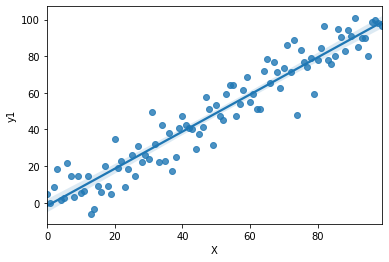

<IPython.core.display.Javascript object>

In [5]:
# plot X with y1
sns.regplot(X, y1)
plt.xlabel("X")
plt.ylabel("y1")
plt.show()

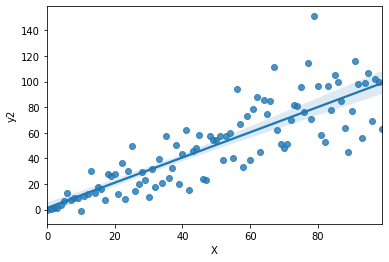

<IPython.core.display.Javascript object>

In [6]:
# plot X with y2
sns.regplot(X, y2)
plt.xlabel("X")
plt.ylabel("y2")
plt.show()

In [7]:
# What about something more formal than this eyeball test?
X_const = sm.add_constant(X)

# Fit a model for X to predict y1
model_1 = sm.OLS(y1, X_const).fit()

<IPython.core.display.Javascript object>

In [8]:
# Fit a model for X to predict y2
model_2 = sm.OLS(y2, X_const).fit()

<IPython.core.display.Javascript object>

In [9]:
# Documenation: https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.het_breuschpagan.html

# Null hypothesis is homoscedastic           (p > 0.05)
# Alternative hypothesis is heteroscedastic  (p < 0.05)
_, p1, _, _ = sms.het_breuschpagan(model_1.resid, X_const)
_, p2, _, _ = sms.het_breuschpagan(model_2.resid, X_const)

print(p1)
print(p2)

0.6013945776291476
0.0009785352144070652


<IPython.core.display.Javascript object>

In [10]:
y_pred1 = model_1.predict(X_const)

# Bartlet and levene both say y1 residuals are failing the
# assumption; this disagrees with het_breuschpagan and our
# eye ball test
_, p = stats.bartlett(y_pred1, model_1.resid)
p

2.0745240643099586e-26

<IPython.core.display.Javascript object>

In [11]:
_, p = stats.levene(y_pred1, model_1.resid)
p

5.110599562064002e-24

<IPython.core.display.Javascript object>

### 🥵 #2

* How do we evaluate for multicollinearity and why is this assumption important?
  * What even is multicollinearity? `Highly correlated predictors/features/inputs`
  * Do we want to have multicollinearity or no multicollinearity? `no mutlicollinearity`
  * In the below cell... Does `X` contain significant multicollinearity?  `yes`
  * When creating dummies/one-hot-encoded variables, what do we need to do to avoid multicolinearararity?

In [12]:
# set seed for reproducible random stuff
np.random.seed(42)

n = 20
x1 = np.arange(n)
x2 = np.random.normal(size=n)
x3 = 2 * np.arange(n) + np.random.normal(0, 1, n)
X = pd.concat((pd.Series(x) for x in [x1, x2, x3]), axis=1)
X.columns = ["x1", "x2", "x3"]

<IPython.core.display.Javascript object>

In [13]:
print_vif(X)

VIF results
-------------------------------
const      5.074372
x1       169.655508
x2         1.869569
x3       177.519575
dtype: float64
-------------------------------



<IPython.core.display.Javascript object>

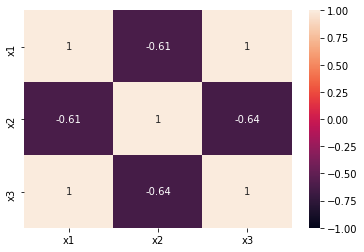

<IPython.core.display.Javascript object>

In [14]:
sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

## t-tests again!! 🎉

I can feel the excitement bubbling up in you all just writing this... I know, I missed them too.

Let's look more at this $t$ distribution to start.  We didn't really do that before.

* Generate a t distribution with `np.random._______`.
    * Use a large-ish sample size
    * Play with the value of the degrees of freedom parameter (From the slide: "more degrees of freedom means closer to the normal distribution")
    

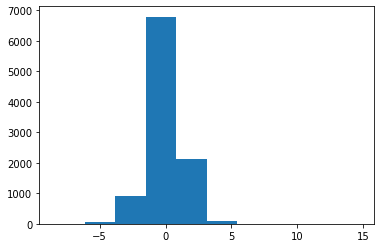

<IPython.core.display.Javascript object>

In [15]:
# set seed for reproducible random stuff
np.random.seed(42)

# Generate a t distribution with an np.random function and plot
n = 1000

x = np.random.standard_t(5, size=10000)
plt.hist(x)
plt.show()

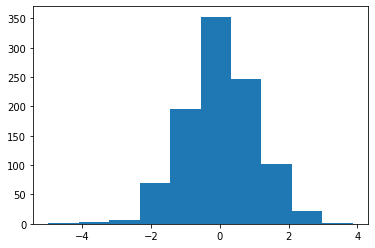

<IPython.core.display.Javascript object>

In [16]:
x = np.random.standard_t(20, size=n)
plt.hist(x)
plt.show()

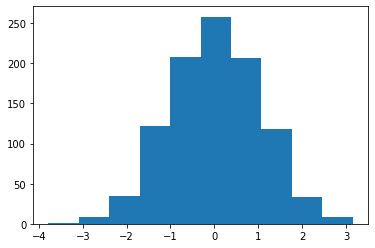

<IPython.core.display.Javascript object>

In [17]:
x = np.random.standard_t(200, size=n)
plt.hist(x)
plt.show()

* What's the null hypothesis in a t-test?
* When do we reject this null hypothesis?

Below are the average heights (in cm) by sex in USA according to [this big ole report](https://www.cdc.gov/nchs/data/series/sr_03/sr03_039.pdf) that I really found from [this wikipedia page](https://en.wikipedia.org/wiki/Average_human_height_by_country); the info also gives the sample size and standard deviation.

* Generate random normal samples using this information.
* Plot overlaid histograms of these samples you generated.

In [18]:
# TODO: FILL ME IN

# male_n = 5232
# male_avg = 175.3
# male_sd = 15.2

# female_n = 5547
# female_avg = 161.5
# female_sd = 15.2

# # Generate random normal samples using this information.
# np.random.seed(42)
# female_height = np.random.normal()
# male_height = _____

# # Plot overlaid histograms of these samples you generated.
# _____
# _____
# plt.show()

<IPython.core.display.Javascript object>

According to the histograms (and the average) men are taller.  Is this difference significant?

What if we had biased samples?? What is a biased sample??

Let's say we took a random sample of women and only ended up with WNBA players (not likely with a random sample, but the beauty of randomness is that it's possible, some things are just unlikely).  Below is the average height for WNBA players according to [reference.com](https://www.reference.com/world-view/average-height-wnba-player-a3cf4bccebffecfb); also is the number of WNBA players according to the [New York Times](https://www.nytimes.com/2018/05/05/sports/wnba-los-angeles-sparks.html).

Let's say our sample of men ended up with only marathon runners.  Below is the average height for top 100 male marathon runners according to [runnersworld.com](https://www.runnersworld.com/news/a20855134/great-marathoners-over-six-feet-tall-are-rare/).  

Use the same standard deviations from before and:
* generate some more normal distributions
* re-plot
* re-ttest

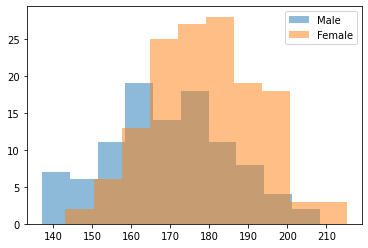

Ttest_indResult(statistic=-5.412208606263234, pvalue=1.4964895564228683e-07)

<IPython.core.display.Javascript object>

In [19]:
std = 15.2

wnba_avg = 180.3
wnba_n = 144

marathon_avg = 169.92
marathon_n = 100

# generate some more normal distributions
male_heights = np.random.normal(marathon_avg, std, marathon_n)
female_heights = np.random.normal(wnba_avg, std, wnba_n)

# re-plot
plt.hist(male_heights, alpha=0.5, label="Male")
plt.hist(female_heights, alpha=0.5, label="Female")
plt.legend()
plt.show()

# re-test
stats.ttest_ind(male_heights, female_heights)

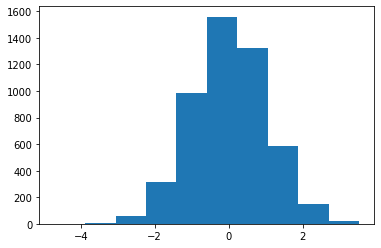

<IPython.core.display.Javascript object>

In [20]:
plt.hist(np.random.standard_t(242, 5000))
plt.show()

We conclude the opposite! Kinda forced us into this.. but! This is the whole idea about the p-value and the typical 5% cutoff.  The p-value is trying to help us differentiate from results that occur purely from chance related to sampling.  AKA every p-value is trying to protect against the chance that you're comparing WNBA players and marathoners when you want to be comparing women and men.  AKA a p-value is the probability that random chance generated differences that you're seeing in the data.

When we reject the null at the 5% level we're still saying there's a 5% chance these results happened due to sampling bias.  Typically 5% is pretty good in practice; here we forced the issue and got a reallllly unlikely sample to happen randomly.

## Regression and t-tests!

So why are we talking about t-tests?  I thought this was a linear regression class?

This is how we test if a predictor is 'significant'.  In a business context maybe we discover that our company's number of hours worked isn't a significant predictor of success; with that information we could argue that taking next Monday off isn't such a bad thing.

Enough about stats and business, lets get back to some snails.

* With the imported abalone dataset
  * Use `Whole_Weight` and `Diameter` as the predictors and `Rings` as the target.
  * Build a regression model using `statsmodels`
  * Print the model summary
* Use the output to identify if any of the predictors are significant.  Which ones are if any? `____________`

In [21]:
# Null hypothesis: coefficient is 0
# Alt hypothesis: coefficient is not 0

<IPython.core.display.Javascript object>

In [22]:
cols = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole_Weight",
    "Shucked_Weight",
    "Visecra_Weight",
    "Shell_Weight",
    "Rings",
]
abalone = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/1GwCnxFT4Sd6iZDj07kNNhEREr7OJQnGvtxd67b5AMio/export?format=csv",
    names=cols,
)

<IPython.core.display.Javascript object>

In [23]:
# Use `Whole_Weight` and `Diameter` as the predictors
X = abalone[["Whole_Weight", "Diameter"]]

# `Rings` as the target
y = abalone["Rings"]

# Build a regression model using `statsmodels`
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

# Print the model summary
model.summary()

# Null hypothesis: coefficient is 0
# Alt hypothesis: coefficient is not 0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     1031.
Date:                Tue, 01 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:55:53   Log-Likelihood:                -9977.6
No. Observations:                4177   AIC:                         1.996e+04
Df Residuals:                    4174   BIC:                         1.998e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.7254      0.286      9.535      0.000       2.165       3.286
Whole_Weight     0.3925      0.220      1.786      0.074      -0.038       0.823
Diameter        16.8749      1.086     15.541      0.000      14.746      19.004
==============================================================================
Omnibus:                     1406.407   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4665.317
Skew:                           1.707   Prob(JB):                         0.00
Kurtosis:                       6.892   Cond. No.                         39.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>

In [24]:
model.resid.size

4177

<IPython.core.display.Javascript object>

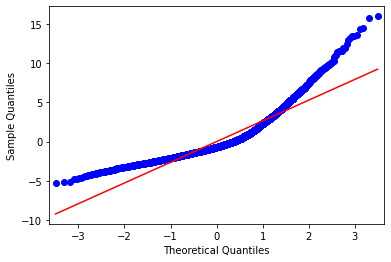

<IPython.core.display.Javascript object>

In [25]:
sm.qqplot(model.resid, line="s")
plt.show()

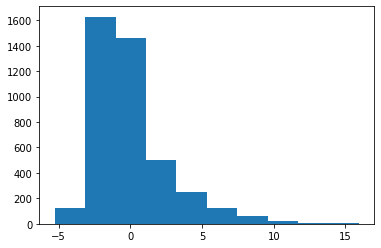

<IPython.core.display.Javascript object>

In [26]:
plt.hist(model.resid)
plt.show()

Note that `sklearn` agrees

In [27]:
model = LinearRegression()
model.fit(X, y)

weight_coef, diameter_coef = model.coef_
print(weight_coef, diameter_coef)

0.392522833826243 16.874884224472446


<IPython.core.display.Javascript object>

We can recreate this output by 'bootstrapping' our data, fitting a model to each bootstrapped sample and seeing how the coefficients change.

In [28]:
np.random.seed(42)

data = abalone[["Whole_Weight", "Diameter", "Rings"]]

weight_coefs = []
diameter_coefs = []
for i in range(1000):
    sample = abalone.sample(frac=1.0, replace=True)
    X = sample[["Whole_Weight", "Diameter"]]
    y = sample["Rings"]

    model = LinearRegression()
    model.fit(X, y)

    weight_coef, diameter_coef = model.coef_

    weight_coefs.append(weight_coef)
    diameter_coefs.append(diameter_coef)

<IPython.core.display.Javascript object>

In [29]:
weight_ci_lo = np.percentile(weight_coefs, 2.5)
weight_ci_hi = np.percentile(weight_coefs, 97.5)

print("Weight Coefficient CI")
weight_ci_lo, weight_ci_hi

Weight Coefficient CI


(-0.03816510555693532, 0.8350225252385813)

<IPython.core.display.Javascript object>

In [30]:
diameter_ci_lo = np.percentile(diameter_coefs, 2.5)
diameter_ci_hi = np.percentile(diameter_coefs, 97.5)

print("Diameter Coefficient CI")
diameter_ci_lo, diameter_ci_hi

Diameter Coefficient CI


(15.016223583464566, 18.754935593803552)

<IPython.core.display.Javascript object>

* Plot histograms for the coefficient sampling distributions
* Add lines for the ci bounds

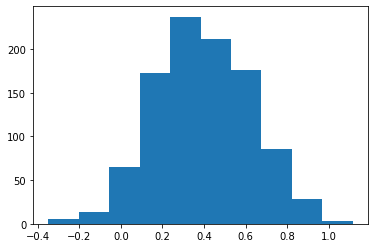

<IPython.core.display.Javascript object>

In [31]:
plt.hist(weight_coefs)
plt.show()

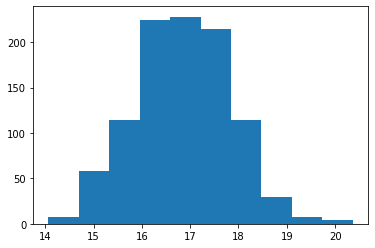

<IPython.core.display.Javascript object>

In [32]:
plt.hist(diameter_coefs)
plt.show()

-----
## Afternoon

Let's start model Rings from scratch.  We won't restrict ourselves on the features we can use.  Everything is fair game. Readyyyy.. go

In [33]:
cols = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole_Weight",
    "Shucked_Weight",
    "Visecra_Weight",
    "Shell_Weight",
    "Rings",
]
abalone = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/1GwCnxFT4Sd6iZDj07kNNhEREr7OJQnGvtxd67b5AMio/export?format=csv",
    names=cols,
)

<IPython.core.display.Javascript object>

In [34]:
abalone.head(2)

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Visecra_Weight,Shell_Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


<IPython.core.display.Javascript object>

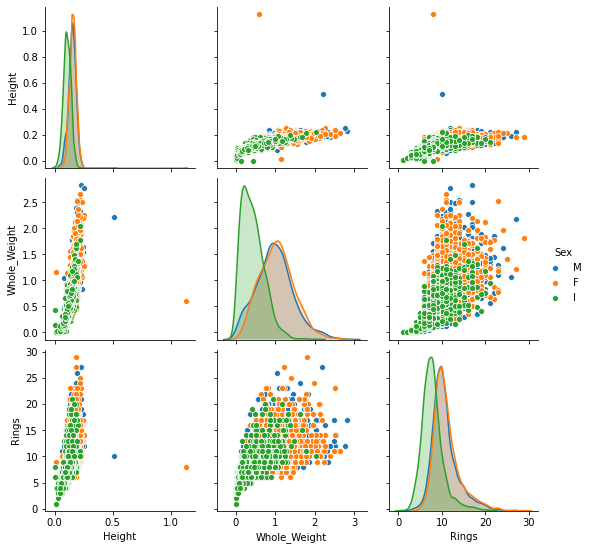

<IPython.core.display.Javascript object>

In [35]:
sns.pairplot(abalone[["Height", "Whole_Weight", "Sex", "Rings"]], hue="Sex")
plt.show()

In [36]:
# Hieght outliers are pattern breaking
# Could be a typo, measurement error, or a freak snail
abalone = abalone[abalone["Height"] <= 0.4]

<IPython.core.display.Javascript object>

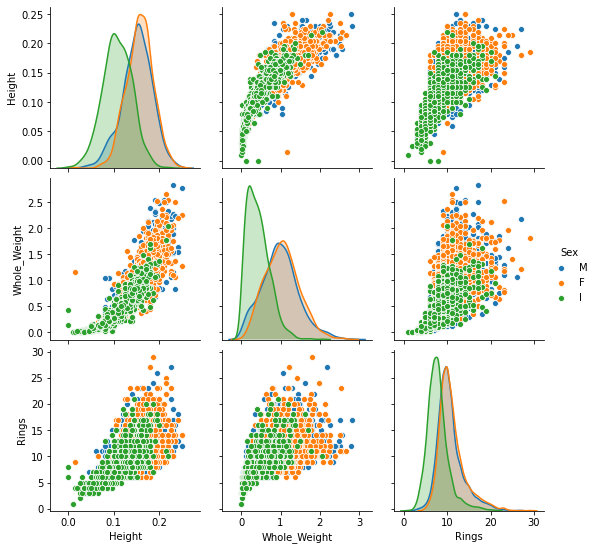

<IPython.core.display.Javascript object>

In [37]:
sns.pairplot(abalone[["Height", "Whole_Weight", "Sex", "Rings"]], hue="Sex")
plt.show()

In [38]:
# For one hot encoding, consider what the 'default' case is
# not always clear like we have here for abalone['Sex']
# We're going to drop the most popular

# Shipping
# ---------
# Standard
# Express
# Overnight


# cost = price + 10*Express + 20*Overnight

<IPython.core.display.Javascript object>

In [39]:
abalone["Sex"].value_counts()

M    1527
I    1342
F    1306
Name: Sex, dtype: int64

<IPython.core.display.Javascript object>

In [40]:
abalone = pd.get_dummies(abalone)
abalone.head(3)

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Visecra_Weight,Shell_Weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9,1,0,0


<IPython.core.display.Javascript object>

In [41]:
abalone = abalone.drop(columns="Sex_M")
abalone.head(3)

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Visecra_Weight,Shell_Weight,Rings,Sex_F,Sex_I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,0,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9,1,0


<IPython.core.display.Javascript object>

In [42]:
X = abalone.drop(
    columns=[
        "Rings",
        "Length",
        "Shucked_Weight",
        "Visecra_Weight",
        "Shell_Weight",
        "Diameter",
    ]
)
y = abalone["Rings"]

<IPython.core.display.Javascript object>

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

In [44]:
print_vif(X_train)

VIF results
-------------------------------
const           32.407003
Height           4.708271
Whole_Weight     4.726737
Sex_F            1.279516
Sex_I            1.690422
dtype: float64
-------------------------------



<IPython.core.display.Javascript object>

In [45]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     518.7
Date:                Tue, 01 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:56:08   Log-Likelihood:                -7831.3
No. Observations:                3340   AIC:                         1.567e+04
Df Residuals:                    3335   BIC:                         1.570e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.7065      0.249     14.898      0.000       3.219       4.194
Height          47.4145      2.473     19.173      0.000      42.566      52.263
Whole_Weight    -0.2002      0.194     -1.034      0.301      -0.580       0.180
Sex_F            0.1903      0.107      1.779      0.075      -0.019       0.400
Sex_I           -0.7925      0.122     -6.521      0.000      -1.031      -0.554
==============================================================================
Omnibus:                     1057.057   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3523.635
Skew:                           1.587   Prob(JB):                         0.00
Kurtosis:                       6.904   Cond. No.                         80.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>

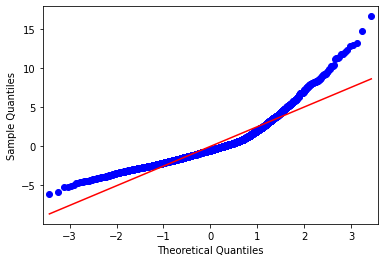

<IPython.core.display.Javascript object>

In [46]:
sm.qqplot(model.resid, line="s")
plt.show()

In [47]:
_, p, _, _ = het_breuschpagan(model.resid, X_train_const)
p

4.7794364208462885e-23

<IPython.core.display.Javascript object>

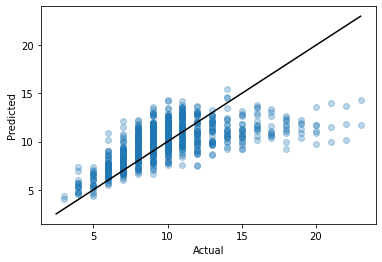

<IPython.core.display.Javascript object>

In [48]:
y_pred = model.predict(X_test_const)

plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([2.5, 23], [2.5, 23], c="black")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

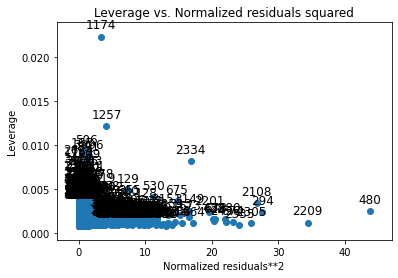

<IPython.core.display.Javascript object>

In [49]:
plot_leverage_resid2(model)
plt.show()

In [50]:
X_train.loc[1174, :]

Height          0.0150
Whole_Weight    1.1565
Sex_F           1.0000
Sex_I           0.0000
Name: 1174, dtype: float64

<IPython.core.display.Javascript object>

------

Let's rebuild our model and use an *interaction term* (\**gasp*\*).  Let's go back to using only `'Whole_Weight'` and `'Diameter'`.  After creating the `X` and `y`:

* Create a new feature that captures the interaction between our current 2 predictors
  * Multiply the 2 features together and assign this to a new column
* Rebuild the model using the 3 features
* Re-print the summary
* Interpret the t-tests for these coefficients

In [51]:
# Define X (['Whole_Weight', 'Diameter']) and y ('Rings')


<IPython.core.display.Javascript object>

In [52]:
# Create a new feature that captures the interaction between our current 2 predictors
X["ww_d_interaction"] = _____

# Build a regression model using `statsmodels`
____

# Print the model summary
____

NameError: name '_____' is not defined

<IPython.core.display.Javascript object>

Wait, what did we just do?

In [ ]:
# No need to worry about this code for needs today.
# Of course, give it a look if you're curious.

# its easier to see if we bin we'll bin weight and then a model
# for diameter when within each bin of weight
def bin_array(x, n_bins=5):
    percentiles = np.linspace(0, 100, n_bins + 1)[:-1]
    bins = np.percentile(x, percentiles)
    binned = np.digitize(x, bins)
    return binned


abalone["binned_weight"] = bin_array(abalone["Whole_Weight"])
bins = abalone["binned_weight"].unique()
for b in bins:
    subset = abalone[abalone["binned_weight"] == b]

    # if we have only 1 row we wont fit a model
    if subset.shape[0] <= 1:
        continue

    X = subset["Diameter"]
    y = subset["Rings"]

    X_const = sm.add_constant(X)
    y_pred = sm.OLS(y, X_const).fit().predict()

    lab = f"Weight: Bin {b}"
    plt.plot(X, y_pred, label=lab, lw=4)
    ## (un)comment below to toggle plotting on same axes
    plt.scatter(X, y, label=lab, alpha=0.1)
    plt.show()


plt.xlabel("Diameter")
plt.ylabel("Rings")
plt.title("Interaction between Diameter and Weight")
plt.legend()
plt.show()

So what do we see here? How Diameter affects Rings depends on how heavy our snail is! When our snail is lighter a higher diameter means more Rings.  When we go up in weight we start to see this trend taper off, at a certain weight diameter starts to matter less for predicting rings! In other words the effects of diameter and weight interact with each other.